In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 56.7 MB/s eta 0:00:00


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'
# !kaggle competitions download -c hackathon-online-fake-news-classification
# import zipfile

# # Define the path to your zip file
# file_path = '/content/hackathon-online-fake-news-classification.zip'  # Replace 'your_file.zip' with your file's name

# # Unzip the file to a specific destination
# with zipfile.ZipFile(file_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification')  # Replace 'destination_folder' with your desired folder


In [ ]:
def savedf(data,test_data):
  data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/train_cleaned.csv')
  test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/test_cleaned.csv')


# Importing library

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/train.csv"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/test.csv"

**Import Lib**

In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
print(stopwords.words('english'))
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

import re
import string

import ast

import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
# from pythainlp.util import normalize
# from pythainlp.corpus.common import thai_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Data Prepairation

In [ ]:
data = pd.read_csv(train_dir)
data

,id,text,language,label
0,GZsDkNhz42u4SAzbAnUouC,"Last month, Mr. McLaren delivered a preliminar...",english,Real
1,jaRxYZgqXRNrxZiPiLT6xy,JOHANNESBURG (Reuters) - Leaders of Zimbabwe s...,english,Real
2,nYUyyPh5R5zxs8dPa4p6XY,“But our real goal is to reach the stage when ...,english,Real
3,myF2ZaAj2ekwKxuoN8fprG,BEN CARSON fearlessly explain the TRUTH behind...,english,Fake
4,DUQVYqAz4W6EZBy2CFevZq,They just spent big bucks on a new headquarter...,english,Fake
...,...,...,...,...
42445,T2TAxsd3ZX76QPCiCYk45S,Shawn Helton ศตวรรษที่ 21 Wireanother Active-S...,thai,Fake
42446,AEyZjphKDHLfrxbuzJDUMU,"“If we just impose a tariff, they’ll put recip...",english,Real
42447,A7XDwhEUCDctCcTmWXiq7w,"At a blistering speech in Columbus, Ohio (a ve...",english,Fake
42448,Q579MHsdizW54cN5fNBy22,JOHANNESBURG (Reuters) - South Africa s ruling...,english,Real


from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in data.groupby('language')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('language')
_ = plt.ylabel('label')

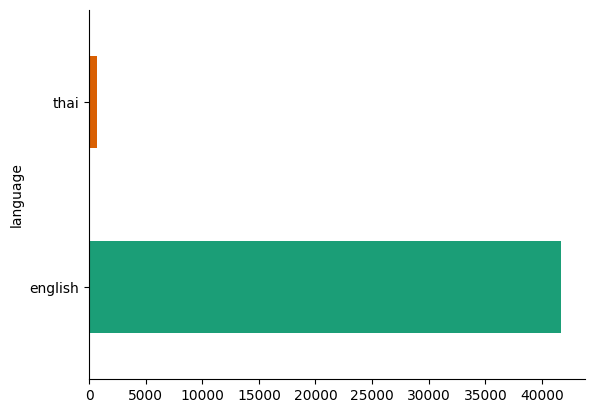

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

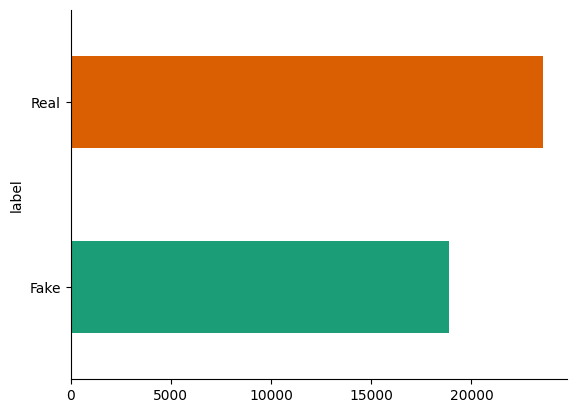

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test_data = pd.read_csv(test_dir)
test_data

,id,text,language
0,63e2vyej6oXukEfDdoGuA5,"— Holger Stark (@holger_stark) January 20, 2...",english
1,ZjYG72fdvd6JmazkS32ZFx,Can you hear us now?If they keep this up Disne...,english
2,ZYUhHXzaDxtncvd6nw8yiy,“I’ve witnessed him as a businessman sitting a...,english
3,HejAe5F5BGKD4HUYMT9DTg,"WASHINGTON (Sputnik) — Earlier in the day, loc...",english
4,5ZjAEKgz9RCsBykjtYyp4S,A world where our resources are applied creati...,english
...,...,...,...
20904,W425RhXCDso796s9LWrCye,"Friday on ABC’s “The View,” senior for Brei...",english
20905,EWwMtde6s3skSDmLKXPojr,Conservative pundit Sean Hannity leveled what ...,english
20906,afMmnJ6K3LSpsHSPbaSr45,The court said Samsung s financial support of ...,english
20907,MCakJo4x4pkoELSiPvtgkB,[The drapes were a change from the crimson dra...,english


# EDA

In [ ]:
data['text'][0]

'Last month, Mr. McLaren delivered a preliminary report to global track and field officials as they were scrutinizing Russia he called Dr. Rodchenkov’s detailed account of swapping out   urine at Sochi with the help of Russia’s intelligence service “credible and verifiable,” adding that he had evidence to confirm that “the ministry of sport was involved in instructing the laboratory to not report positive sample results. ”“If McLaren produces clear, convincing, irrefutable evidence that there has been systemic   doping in Russian sport,” said Paul Melia, Canada’s top antidoping official, “the appropriate sanction would be for the I. O. C. to ban the Russian Olympic Committee from taking a team to Rio. ”“It seems very likely that the Report will confirm what will be one of the biggest doping scandals in history, implicating the Russian Government in a massive conspiracy against the clean athletes of the world,” wrote Joseph de Pencier, the chief executive of the national antidoping trad

In [ ]:
data['text'][5]

'To compare, here in 2017, when King made a much worse remark   the infamous and openly white nationalist  we can t restore our civilization with somebody else s babies  tweet   current House Speaker Paul Ryan was tepid in his response, only saying that he is sure that Rep. King  misspoke.There s also White House Press Secretary Sean Spicer s saying that Nazi leader Adolf Hitler never used chemical weapons   all while referring to Nazi death camps as  Holocaust Centers.  House Speaker John Boehner said, from a podium to the press that the comments were  hateful,  and  offensive.  He has said that one book that shapes his world view is a French novel called  Camp of Saints,  which fantasizes that immigrants   conveniently of the black and brown variety   are coming to destroy the white race.pic.twitter.com/bPZ2UtRkxW  The Last Word (@TheLastWord) November 16, 2016And let s not forget Attorney General Jeff Sessions, the guy who they all say isn t a racist but was deemed too racist to be 

In [ ]:
data['text'][111]

'According to the Kaiser Family Foundation analysis, five states would stand to lose more than 30 percent of their federal healthcare money from 2020-2026: New York (down 35 percent), Oregon (down 32 percent), Connecticut (down 31 percent), Vermont (down 31 percent) and Minnesota (down 30 percent).The analysis found that six Republican-leaning states would get at least 40 percent more in federal funds: Mississippi (up 148 percent), Texas (up 75 percent), Kansas (up 61 percent), Georgia (up 46 percent), South Dakota (up 45 percent) and Tennessee (up 44 percent).The non-partisan Congressional Budget Office has not yet assessed the bill’s effects but independent analyses indicate it would fundamentally redistribute federal healthcare money, generally with Republican-leaning states benefiting and Democratic-leaning states losing.The nonprofit Kaiser Family Foundation, a healthcare research group, estimated on Thursday that states that expanded Medicaid under Obamacare would lose $180 billi

**Prepocessing**

## Cleaning text

In [ ]:
clean_data_dir = '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/data_cleaned'
clean_test_dir = '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/test_data_cleaned'

In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 42.2 MB/s eta 0:00:00


In [ ]:
data['text'].iloc[53]

'Rio de Janeiro - Eliud Kipchoge แห่งเคนยาที่ชื่นชอบชนะการแข่งขันกีฬาโอลิมปิกมาราธอนเมื่อวันอาทิตย์ที่ผ่านมาโดยดึงออกไปสี่ไมล์สุดท้ายเพื่อชนะใน 2 ชั่วโมง 8 นาที 44 วินาที\n Feyisa Lilesa แห่งเอธิโอเปียใช้เวลาสองใน 2:09:54 ในขณะที่ Galen Rupp แห่งสหรัฐอเมริกาได้รับรางวัลเหรียญทองแดงในเวลา 2:10:05 น. ซึ่งเป็นส่วนตัวที่ดีที่สุดของเขา\n Kenyans ชนะทั้งมาราธอนในเกม Rio\n Jemima Sumgong ชนะการวิ่งมาราธอนของผู้หญิงกลายเป็นผู้หญิงเคนยาคนแรกที่ได้รับรางวัลเหรียญทองในเหตุการณ์ 26.\n “ มันวิเศษมากสำหรับเรา” Kipchoge อายุ 31 ปีกล่าว\n “ เค็นยันจะมีความสุขมาก\n นี่เป็นประวัติศาสตร์ครั้งแรกที่ผู้หญิงและผู้ชายชนะ” ในการแข่งขันกีฬาโอลิมปิกเดียวกัน“ และเป็นช่วงเวลาที่ดีที่สุดในชีวิตของฉัน\n ” ที่ 35 กิโลเมตรหรือ 21 ไมล์ 7 ไมล์จากการแข่งขันของผู้ชาย Kipchoge ถือเป็นผู้นำเพียงหนึ่งวินาทีเหนือ Lilesa และ Rupp\n Rupp ดูเหมือนจะกลายเป็นคนอเมริกันคนแรกที่ชนะการแข่งขันกีฬาโอลิมปิกมาราธอนตั้งแต่ Frank Shorter ชนะในปี 1972 แต่นี่เป็นเพียงการวิ่งมาราธอนครั้งที่สองที่ดำเนินการโดย Rupp ซึ่งเป็นคนแรกของเขาในการแข่ง

In [ ]:

def clean_text_eng(text):
      # Lowercase
    text = text.lower()
      # Remove HTML tags and URLs
    text = re.sub(r'\S*(www\S+|http\S+|https\S+|S+www\S+|s+http\S+|s+https\S+)','',text, flags=re.MULTILINE)
    text = re.sub(r'<[^>]+>', '', text)
      # Remove HTML content using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
      # Remove numbers
    text = re.sub(r'\d+', '', text)
      # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
      # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def clean_text_thai(text):
    # Thai text cleaning steps
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub(r'[๐๑๒๓๔๕๖๗๘๙]+', '', text)
    text = normalize(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Example usage
raw_text = "Rio de Janeiro - Eliud Kipchoge แห่งเคนยาที่ชื่นชอบชนะการแข่งขันกีฬาโอลิมปิกมาราธอนเมื่อวันอาทิตย์ที่ผ่านมาโดยดึงออกไปสี่ไมล์สุดท้ายเพื่อชนะใน 2 ชั่วโมง 8 นาที 44 วินาที\n Feyisa Lilesa แห่งเอธิโอเปียใช้เวลาสองใน 2:09:54 ในขณะที่ Galen Rupp แห่งสหรัฐอเมริกาได้รับรางวัลเหรียญทองแดงในเวลา 2:10:05 น. ซึ่งเป็นส่วนตัวที่ดีที่สุดของเขา\n Kenyans ชนะทั้งมาราธอนในเกม Rio\n Jemima Sumgong ชนะการวิ่งมาราธอนของผู้หญิงกลายเป็นผู้หญิงเคนยาคนแรกที่ได้รับรางวัลเหรียญทองในเหตุการณ์ 26.\n “ มันวิเศษมากสำหรับเรา” Kipchoge อายุ 31 ปีกล่าว\n “ เค็นยันจะมีความสุขมาก\n นี่เป็นประวัติศาสตร์ครั้งแรกที่ผู้หญิงและผู้ชายชนะ” ในการแข่งขันกีฬาโอลิมปิกเดียวกัน“ และเป็นช่วงเวลาที่ดีที่สุดในชีวิตของฉัน\n ” ที่ 35 กิโลเมตรหรือ 21 ไมล์ 7 ไมล์จากการแข่งขันของผู้ชาย Kipchoge ถือเป็นผู้นำเพียงหนึ่งวินาทีเหนือ Lilesa และ Rupp\n Rupp ดูเหมือนจะกลายเป็นคนอเมริกันคนแรกที่ชนะการแข่งขันกีฬาโอลิมปิกมาราธอนตั้งแต่ Frank Shorter ชนะในปี 1972 แต่นี่เป็นเพียงการวิ่งมาราธอนครั้งที่สองที่ดำเนินการโดย Rupp ซึ่งเป็นคนแรกของเขาในการแข่งข"
cleaned_text = clean_text_thai(raw_text)
print(cleaned_text)


Rio de Janeiro Eliud Kipchoge แห่งเคนยาที่ชื่นชอบชนะการแข่งขันกีฬาโอลิมปิกมาราธอนเมื่อวันอาทิตย์ที่ผ่านมาโดยดึงออกไปสี่ไมล์สุดท้ายเพื่อชนะใน 2 ชั่วโมง 8 นาที 44 วินาที Feyisa Lilesa แห่งเอธิโอเปียใช้เวลาสองใน 20954 ในขณะที่ Galen Rupp แห่งสหรัฐอเมริกาได้รับรางวัลเหรียญทองแดงในเวลา 21005 น ซึ่งเป็นส่วนตัวที่ดีที่สุดของเขา Kenyans ชนะทั้งมาราธอนในเกม Rio Jemima Sumgong ชนะการวิ่งมาราธอนของผู้หญิงกลายเป็นผู้หญิงเคนยาคนแรกที่ได้รับรางวัลเหรียญทองในเหตุการณ์ 26 “ มันวิเศษมากสำหรับเรา” Kipchoge อายุ 31 ปีกล่าว “ เค็นยันจะมีความสุขมาก นี่เป็นประวัติศาสตร์ครั้งแรกที่ผู้หญิงและผู้ชายชนะ” ในการแข่งขันกีฬาโอลิมปิกเดียวกัน“ และเป็นช่วงเวลาที่ดีที่สุดในชีวิตของฉัน ” ที่ 35 กิโลเมตรหรือ 21 ไมล์ 7 ไมล์จากการแข่งขันของผู้ชาย Kipchoge ถือเป็นผู้นำเพียงหนึ่งวินาทีเหนือ Lilesa และ Rupp Rupp ดูเหมือนจะกลายเป็นคนอเมริกันคนแรกที่ชนะการแข่งขันกีฬาโอลิมปิกมาราธอนตั้งแต่ Frank Shorter ชนะในปี 1972 แต่นี่เป็นเพียงการวิ่งมาราธอนครั้งที่สองที่ดำเนินการโดย Rupp ซึ่งเป็นคนแรกของเขาในการแข่งข


In [ ]:
def clean_based_on_language(row):
    if row['language'] == 'english':
        return clean_text_eng(row['text'])
    elif row['language'] == 'thai':
        return clean_text_thai(row['text'])


In [ ]:
data['cleaned_text'] = data.apply(clean_based_on_language, axis=1)
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/data_cleaned')
print('train data has cleaned - saved')


test_data['cleaned_text'] = test_data.apply(clean_based_on_language, axis=1)
test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/test_data_cleaned')
print('test data has cleaned - saved')



<ipython-input-28-782248efaf30>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-28-782248efaf30>:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


train data has cleaned - saved


<ipython-input-28-782248efaf30>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-28-782248efaf30>:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


test data has cleaned - saved


In [ ]:
test_data

,id,text,language,cleaned_text
0,63e2vyej6oXukEfDdoGuA5,"— Holger Stark (@holger_stark) January 20, 2...",english,— holger stark holgerstark january protest fir...
1,ZjYG72fdvd6JmazkS32ZFx,Can you hear us now?If they keep this up Disne...,english,can you hear us nowif they keep this up disney...
2,ZYUhHXzaDxtncvd6nw8yiy,“I’ve witnessed him as a businessman sitting a...,english,“i’ve witnessed him as a businessman sitting a...
3,HejAe5F5BGKD4HUYMT9DTg,"WASHINGTON (Sputnik) — Earlier in the day, loc...",english,washington sputnik — earlier in the day local ...
4,5ZjAEKgz9RCsBykjtYyp4S,A world where our resources are applied creati...,english,a world where our resources are applied creati...
...,...,...,...,...
20904,W425RhXCDso796s9LWrCye,"Friday on ABC’s “The View,” senior for Brei...",english,friday on abc’s “the view” senior for breitbar...
20905,EWwMtde6s3skSDmLKXPojr,Conservative pundit Sean Hannity leveled what ...,english,conservative pundit sean hannity leveled what ...
20906,afMmnJ6K3LSpsHSPbaSr45,The court said Samsung s financial support of ...,english,the court said samsung s financial support of ...
20907,MCakJo4x4pkoELSiPvtgkB,[The drapes were a change from the crimson dra...,english,the drapes were a change from the crimson drap...


# Preprocessing

## Tokenizer

In [ ]:
from nltk.tokenize import word_tokenize as nltk_word_tokenize
from pythainlp.tokenize import word_tokenize as pythai_word_tokenize

nltk.download('punkt')  # Required for NLTK's tokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def conditional_tokenize(text, language):
    """
    Tokenizes the text based on the specified language.

    :param text: The text to tokenize.
    :param language: The language of the text ('thai' or 'english').
    :return: A list of tokens.
    """
    if language == 'english':
        # Use NLTK's tokenizer for English
        return nltk_word_tokenize(text)
    elif language == 'thai':
        # Use PyThaiNLP's tokenizer for Thai
        return pythai_word_tokenize(text)
    else:
        raise ValueError("Unsupported language. Please specify 'thai' or 'english'.")


In [ ]:
data['token'] = data.apply(lambda row: conditional_tokenize(row['cleaned_text'], row['language']), axis=1)
print('data tokenized - saveing')
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/train_cleaned.csv')
print('data - saved')

test_data['token'] = test_data.apply(lambda row: conditional_tokenize(row['cleaned_text'], row['language']), axis=1)
print('test_data - tokenized - saving')
test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/test_cleaned.csv')
print('test_data - saved')


data tokenized - saveing
data - saved
test_data - tokenized - saving
test_data - saved


In [ ]:
data.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

savedf(data,test_data)


## Clean tokens

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pythainlp.corpus import thai_stopwords


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
test_sample = data['token'].iloc[3]
test_sample


Remove stopword

In [ ]:

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from pythainlp.corpus import thai_stopwords

nltk.download('stopwords')

def remove_stopwords(tokens, language):
    """
    Removes stopwords from a list of tokens based on the specified language.

    :param tokens: List of tokens to process.
    :param language: Language of the tokens ('thai' or 'english').
    :return: List of tokens with stopwords removed.
    """
    if language == 'english':
        # Load English stopwords from NLTK
        eng_stopwords = set(nltk_stopwords.words('english'))
        # Remove stopwords
        filtered_tokens = [token for token in tokens if token.lower() not in eng_stopwords]
    elif language == 'thai':
        # Load Thai stopwords from PyThaiNLP
        thai_stopwords_set = thai_stopwords()
        # Remove stopwords
        filtered_tokens = [token for token in tokens if token not in thai_stopwords_set]
    else:
        raise ValueError("Unsupported language. Please specify 'thai' or 'english'.")

    return filtered_tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Convert dtype of token to list

applie remove_stopword function

In [ ]:
data['token_remove_stop_word'] = data.apply(lambda row: remove_stopwords(row['token'], row['language']), axis=1)
data.to_csv('train_cleaned.csv', index=False)


In [ ]:
data

,id,text,language,label,cleaned_text,token,token_remove_stop_word
0,GZsDkNhz42u4SAzbAnUouC,"Last month, Mr. McLaren delivered a preliminar...",english,Real,last month mr mclaren delivered a preliminary ...,"[last, month, mr, mclaren, delivered, a, preli...","[last, month, mr, mclaren, delivered, prelimin..."
1,jaRxYZgqXRNrxZiPiLT6xy,JOHANNESBURG (Reuters) - Leaders of Zimbabwe s...,english,Real,johannesburg reuters leaders of zimbabwe s rul...,"[johannesburg, reuters, leaders, of, zimbabwe,...","[johannesburg, reuters, leaders, zimbabwe, rul..."
2,nYUyyPh5R5zxs8dPa4p6XY,“But our real goal is to reach the stage when ...,english,Real,“but our real goal is to reach the stage when ...,"[“, but, our, real, goal, is, to, reach, the, ...","[“, real, goal, reach, stage, redundant, stori..."
3,myF2ZaAj2ekwKxuoN8fprG,BEN CARSON fearlessly explain the TRUTH behind...,english,Fake,ben carson fearlessly explain the truth behind...,"[ben, carson, fearlessly, explain, the, truth,...","[ben, carson, fearlessly, explain, truth, behi..."
4,DUQVYqAz4W6EZBy2CFevZq,They just spent big bucks on a new headquarter...,english,Fake,they just spent big bucks on a new headquarter...,"[they, just, spent, big, bucks, on, a, new, he...","[spent, big, bucks, new, headquarters, trump, ..."
...,...,...,...,...,...,...,...
42437,T2TAxsd3ZX76QPCiCYk45S,Shawn Helton ศตวรรษที่ 21 Wireanother Active-S...,thai,Fake,Shawn Helton ศตวรรษที่ 21 Wireanother ActiveSh...,"[Shawn, , Helton, , ศตวรรษ, ที่, , 21, , W...","[Shawn, , Helton, , ศตวรรษ, , 21, , Wirean..."
42438,AEyZjphKDHLfrxbuzJDUMU,"“If we just impose a tariff, they’ll put recip...",english,Real,“if we just impose a tariff they’ll put recipr...,"[“, if, we, just, impose, a, tariff, they, ’, ...","[“, impose, tariff, ’, put, reciprocal, tariff..."
42439,A7XDwhEUCDctCcTmWXiq7w,"At a blistering speech in Columbus, Ohio (a ve...",english,Fake,at a blistering speech in columbus ohio a very...,"[at, a, blistering, speech, in, columbus, ohio...","[blistering, speech, columbus, ohio, important..."
42440,Q579MHsdizW54cN5fNBy22,JOHANNESBURG (Reuters) - South Africa s ruling...,english,Real,johannesburg reuters south africa s ruling afr...,"[johannesburg, reuters, south, africa, s, ruli...","[johannesburg, reuters, south, africa, ruling,..."


In [ ]:
test_data['token_remove_stop_word'] = test_data.apply(lambda row: remove_stopwords(row['token'], row['language']), axis=1)
test_data.to_csv('test_cleaned.csv', index=False)
test_data

,id,text,language,cleaned_text,token,token_remove_stop_word
0,63e2vyej6oXukEfDdoGuA5,"— Holger Stark (@holger_stark) January 20, 2...",english,— holger stark holgerstark january protest fir...,"[—, holger, stark, holgerstark, january, prote...","[—, holger, stark, holgerstark, january, prote..."
1,ZjYG72fdvd6JmazkS32ZFx,Can you hear us now?If they keep this up Disne...,english,can you hear us nowif they keep this up disney...,"[can, you, hear, us, nowif, they, keep, this, ...","[hear, us, nowif, keep, disney, referred, happ..."
2,ZYUhHXzaDxtncvd6nw8yiy,“I’ve witnessed him as a businessman sitting a...,english,“i’ve witnessed him as a businessman sitting a...,"[“, i, ’, ve, witnessed, him, as, a, businessm...","[“, ’, witnessed, businessman, sitting, desk, ..."
3,HejAe5F5BGKD4HUYMT9DTg,"WASHINGTON (Sputnik) — Earlier in the day, loc...",english,washington sputnik — earlier in the day local ...,"[washington, sputnik, —, earlier, in, the, day...","[washington, sputnik, —, earlier, day, local, ..."
4,5ZjAEKgz9RCsBykjtYyp4S,A world where our resources are applied creati...,english,a world where our resources are applied creati...,"[a, world, where, our, resources, are, applied...","[world, resources, applied, creatively, techno..."
...,...,...,...,...,...,...
20896,W425RhXCDso796s9LWrCye,"Friday on ABC’s “The View,” senior for Brei...",english,friday on abc’s “the view” senior for breitbar...,"[friday, on, abc, ’, s, “, the, view, ”, senio...","[friday, abc, ’, “, view, ”, senior, breitbart..."
20897,EWwMtde6s3skSDmLKXPojr,Conservative pundit Sean Hannity leveled what ...,english,conservative pundit sean hannity leveled what ...,"[conservative, pundit, sean, hannity, leveled,...","[conservative, pundit, sean, hannity, leveled,..."
20898,afMmnJ6K3LSpsHSPbaSr45,The court said Samsung s financial support of ...,english,the court said samsung s financial support of ...,"[the, court, said, samsung, s, financial, supp...","[court, said, samsung, financial, support, ent..."
20899,MCakJo4x4pkoELSiPvtgkB,[The drapes were a change from the crimson dra...,english,the drapes were a change from the crimson drap...,"[the, drapes, were, a, change, from, the, crim...","[drapes, change, crimson, drapes, former, pres..."


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')  # For WordNet lemmatizer

def lemmatize_tokens(tokens):

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## WordNetLemmatizer

In [ ]:
data['token_lemm'] = data['token_remove_stop_word'].apply(lemmatize_tokens)
test_data['token_lemm'] = test_data['token_remove_stop_word'].apply(lemmatize_tokens)

savedf(data, test_data)


In [ ]:
data['text_token'] = data['token_remove_stop_word'].apply(tokens_to_text)

data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/train_cleaned.csv', index=True)


In [ ]:
test_data['text_token'] = test_data['token_remove_stop_word'].apply(tokens_to_text)

test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/test_cleaned.csv')

In [ ]:
data

In [ ]:
data.isnull().sum()

Unnamed: 0                0
id                        0
text                      0
language                  0
label                     0
cleaned_text              0
token                     0
token_remove_stop_word    0
token_lemm                0
dtype: int64

## Check outlier

In [ ]:
data[data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,id,text,language,label,cleaned_text,token,cleaned_token,token_remove_stop_word,text_token
3573,3573,3573,9et2GAAQxnxESJwyNRmVcg,США в мире В своей новой статье канадский эксп...,english,Fake,сша в мире в своей новой статье канадский эксп...,"['США', 'в', 'мире', 'В', 'своей', 'новой', 'с...",[],[],NaN
16359,16359,16359,LfY7G5Wg8j9mAPM3KrXD4r,И поскольку среди ближайших советников Трампа ...,english,Fake,и поскольку среди ближайших советников трампа ...,"['И', 'поскольку', 'среди', 'ближайших', 'сове...",[],[],NaN
20067,20067,20067,hbZ8fPSCqDdcjg9eiXTpgF,"Это говорит о том, что Москва смогла добиться ...",english,Fake,это говорит о том что москва смогла добиться к...,"['Это', 'говорит', 'о', 'том', ',', 'что', 'Мо...",[],[],NaN
25587,25587,25587,H4cP3PxSdFgwRJWwm8smhs,"Автор отмечает, что, несмотря на ожесточенную ...",english,Fake,автор отмечает что несмотря на ожесточенную кр...,"['Автор', 'отмечает', ',', 'что', ',', 'несмот...",[],[],NaN
28011,28011,28011,apipad9mKrVRKZfSXptZ7D,"В свою очередь, по данным пресс-службы, Байден...",english,Fake,в свою очередь по данным прессслужбы байден по...,"['В', 'свою', 'очередь', ',', 'по', 'данным', ...",[],[],NaN
30096,30096,30096,7JUe59qWupJMUYFMuzLa9B,"Автор напоминает, что Флинн недавно изложил св...",english,Fake,автор напоминает что флинн недавно изложил сво...,"['Автор', 'напоминает', ',', 'что', 'Флинн', '...",[],[],NaN
39279,39279,39279,4FcqRcW3X48mouG3k3ULb8,на чем не основанные обвинения все дальше подр...,english,Fake,на чем не основанные обвинения все дальше подр...,"['на', 'чем', 'не', 'основанные', 'обвинения',...",[],[],NaN
41269,41269,41269,RrRQ6J6Kk9yKKhipjS9rxw,12:56,english,Fake,NaN,['12:56'],['1256'],['1256'],1256


In [ ]:
test_data[test_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,id,text,language,cleaned_text,token,cleaned_token,token_remove_stop_word,text_token
214,214,214,jmK2RnQKHD25fHYFPE4P9y,Более крупные бандформирования по всей Сирии н...,english,более крупные бандформирования по всей сирии н...,"['Более', 'крупные', 'бандформирования', 'по',...",[],[],NaN
1349,1349,1349,PLFqyk6y7TQvRSqG4Zks4v,Как отмечает в своей новой статье ветеран боев...,english,как отмечает в своей новой статье ветеран боев...,"['Как', 'отмечает', 'в', 'своей', 'новой', 'ст...",[],[],NaN
4743,4743,4743,MS9zHJHgycV3ehWk9p7Gbx,Регион: Юго-Восточная Азия Как отмечает в свое...,english,регион юговосточная азия как отмечает в своей ...,"['Регион', ':', 'Юго-Восточная', 'Азия', 'Как'...",[],[],NaN
5661,5661,5661,dUrK92LVU2bcu5gk9Pctvf,Производители вакцин не перестают удивлять мир...,english,производители вакцин не перестают удивлять мир...,"['Производители', 'вакцин', 'не', 'перестают',...",[],[],NaN
9529,9529,9529,WcpdjXnc5pye4BeeipPHGu,"NO, NO.",english,no no,"['NO', ',', 'NO', '.']","['NO', 'NO']",[],NaN
10689,10689,10689,YfccHzDbu8qBK4wuu8j5Tj,Именно поэтому в ближайшее время можно ожидать...,english,именно поэтому в ближайшее время можно ожидать...,"['Именно', 'поэтому', 'в', 'ближайшее', 'время...",[],[],NaN
10869,10869,10869,fU6q8ugK76jkbgBUM7LkBb,Регион: Европа Как отмечает в своей статье аме...,english,регион европа как отмечает в своей статье амер...,"['Регион', ':', 'Европа', 'Как', 'отмечает', '...",[],[],NaN
13417,13417,13417,Spv4UQpDK3Ncc7nYqt2sX8,Страна: Саудовская Аравия Как отмечает в своей...,english,страна саудовская аравия как отмечает в своей ...,"['Страна', ':', 'Саудовская', 'Аравия', 'Как',...",[],[],NaN


#Feature Extraction

## TF-IDF

In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'text', 'language', 'label', 'cleaned_text',
       'token', 'token_remove_stop_word', 'token_lemm', 'text_token'],
      dtype='object')

Convert token to raw text

In [ ]:
import ast

# Convert string representation of a list to an actual list
def string_to_list(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        # Handle the case where the string is not a list representation
        return []

# Assuming 'token_lemm' column contains string representations of lists
data['token_lemm'] = data['token_lemm'].apply(string_to_list)

# Now you can join the tokens into a single text string
data['text_token'] = data['token_lemm'].apply(lambda tokens: ' '.join(tokens))


# Assuming 'token_lemm' column contains string representations of lists
test_data['token_lemm'] = test_data['token_lemm'].apply(string_to_list)

# Now you can join the tokens into a single text string
test_data['text_token'] = test_data['token_lemm'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
import pandas as pd

path_dir = '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/'
train_df = pd.read_csv(path_dir+'train_df.csv')
test_df = pd.read_csv(path_dir+'test_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/train_df.csv'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack

import numpy as np


# Assuming 'data' and 'test_data' DataFrames with the 'text_token' column already prepared
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the entire dataset if needed or just the training part
train_tfidf = tfidf_vectorizer.fit_transform(train_df['text_token'])
test_tfidf = tfidf_vectorizer.transform(test_df['text_token'])




In [ ]:
tfidf_df_train = pd.DataFrame(train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_test = pd.DataFrame(test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

## LDA

Prepairing

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/cleaned_data/train_cleaned.csv')
# test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/cleaned_data/test_cleaned.csv')

In [ ]:
data['text_token'].head()


0    last month mr mclaren delivered preliminary re...
1    johannesburg reuters leader zimbabwe ruling za...
2    “ real goal reach stage redundant story see sc...
3    ben carson fearlessly explain truth behind pla...
4    spent big buck new headquarters trump probably...
Name: text_token, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import joblib


count_vectorizer = CountVectorizer()
dtm_train = count_vectorizer.fit_transform(data['text_token'])
# dtm_test = count_vectorizer.transform(test_data['text_token'])

n_components = 5
lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda.fit(dtm_train)

lda_train_features = lda.transform(dtm_train)
# lda_test_features = lda.transform(dtm_test)

# lda_train_df = pd.DataFrame(lda_train_features, columns=['topic_{}'.format(i) for i in range(n_components)])
# lda_test_df = pd.DataFrame(lda_test_features, columns=['topic_{}'.format(i) for i in range(n_components)])

In [ ]:
# Save the models and dtm_train for later use
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')
joblib.dump(lda, 'lda_model.pkl')

# Optionally, save dtm_train if needed
joblib.dump(dtm_train, 'dtm_train.pkl')

['dtm_train.pkl']

In [ ]:
lda_train_df

,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.000375,0.276481,0.000375,0.722402,0.000368
1,0.103209,0.558139,0.327394,0.005671,0.005587
2,0.597533,0.001350,0.001360,0.398431,0.001325
3,0.001453,0.001440,0.994243,0.001445,0.001419
4,0.002863,0.294741,0.575585,0.082825,0.043986
...,...,...,...,...,...
42437,0.000393,0.000391,0.000392,0.000397,0.998426
42438,0.076840,0.409078,0.511970,0.001068,0.001043
42439,0.148345,0.001290,0.847828,0.001287,0.001251
42440,0.001008,0.268034,0.634973,0.001014,0.094971


In [ ]:
lda_test_df

,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.031166,0.038313,0.558473,0.371052,0.000997
1,0.163554,0.000921,0.292882,0.541749,0.000893
2,0.027974,0.031560,0.783913,0.156212,0.000342
3,0.002306,0.990787,0.002312,0.002320,0.002275
4,0.984914,0.000400,0.000404,0.013892,0.000390
...,...,...,...,...,...
20896,0.186470,0.000604,0.811755,0.000590,0.000580
20897,0.001662,0.001659,0.881804,0.113248,0.001627
20898,0.065509,0.229445,0.052770,0.651891,0.000385
20899,0.002961,0.002918,0.631010,0.360235,0.002876


In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,id,text,language,label,cleaned_text,token,token_remove_stop_word,token_lemm,text_token
0,0,0,GZsDkNhz42u4SAzbAnUouC,"Last month, Mr. McLaren delivered a preliminar...",english,Real,last month mr mclaren delivered a preliminary ...,"['last', 'month', 'mr', 'mclaren', 'delivered'...","['last', 'month', 'mr', 'mclaren', 'delivered'...","['last', 'month', 'mr', 'mclaren', 'delivered'...",last month mr mclaren delivered preliminary re...
1,1,1,jaRxYZgqXRNrxZiPiLT6xy,JOHANNESBURG (Reuters) - Leaders of Zimbabwe s...,english,Real,johannesburg reuters leaders of zimbabwe s rul...,"['johannesburg', 'reuters', 'leaders', 'of', '...","['johannesburg', 'reuters', 'leaders', 'zimbab...","['johannesburg', 'reuters', 'leader', 'zimbabw...",johannesburg reuters leader zimbabwe ruling za...
2,2,2,nYUyyPh5R5zxs8dPa4p6XY,“But our real goal is to reach the stage when ...,english,Real,“but our real goal is to reach the stage when ...,"['“', 'but', 'our', 'real', 'goal', 'is', 'to'...","['“', 'real', 'goal', 'reach', 'stage', 'redun...","['“', 'real', 'goal', 'reach', 'stage', 'redun...",“ real goal reach stage redundant story see sc...
3,3,3,myF2ZaAj2ekwKxuoN8fprG,BEN CARSON fearlessly explain the TRUTH behind...,english,Fake,ben carson fearlessly explain the truth behind...,"['ben', 'carson', 'fearlessly', 'explain', 'th...","['ben', 'carson', 'fearlessly', 'explain', 'tr...","['ben', 'carson', 'fearlessly', 'explain', 'tr...",ben carson fearlessly explain truth behind pla...
4,4,4,DUQVYqAz4W6EZBy2CFevZq,They just spent big bucks on a new headquarter...,english,Fake,they just spent big bucks on a new headquarter...,"['they', 'just', 'spent', 'big', 'bucks', 'on'...","['spent', 'big', 'bucks', 'new', 'headquarters...","['spent', 'big', 'buck', 'new', 'headquarters'...",spent big buck new headquarters trump probably...
...,...,...,...,...,...,...,...,...,...,...,...
42437,42437,42437,T2TAxsd3ZX76QPCiCYk45S,Shawn Helton ศตวรรษที่ 21 Wireanother Active-S...,thai,Fake,Shawn Helton ศตวรรษที่ 21 Wireanother ActiveSh...,"['Shawn', ' ', 'Helton', ' ', 'ศตวรรษ', 'ที่',...","['Shawn', ' ', 'Helton', ' ', 'ศตวรรษ', ' ', '...","['Shawn', ' ', 'Helton', ' ', 'ศตวรรษ', ' ', '...",Shawn Helton ศตวรรษ 21 Wireanother A...
42438,42438,42438,AEyZjphKDHLfrxbuzJDUMU,"“If we just impose a tariff, they’ll put recip...",english,Real,“if we just impose a tariff they’ll put recipr...,"['“', 'if', 'we', 'just', 'impose', 'a', 'tari...","['“', 'impose', 'tariff', '’', 'put', 'recipro...","['“', 'impose', 'tariff', '’', 'put', 'recipro...",“ impose tariff ’ put reciprocal tariff hurt i...
42439,42439,42439,A7XDwhEUCDctCcTmWXiq7w,"At a blistering speech in Columbus, Ohio (a ve...",english,Fake,at a blistering speech in columbus ohio a very...,"['at', 'a', 'blistering', 'speech', 'in', 'col...","['blistering', 'speech', 'columbus', 'ohio', '...","['blistering', 'speech', 'columbus', 'ohio', '...",blistering speech columbus ohio important swin...
42440,42440,42440,Q579MHsdizW54cN5fNBy22,JOHANNESBURG (Reuters) - South Africa s ruling...,english,Real,johannesburg reuters south africa s ruling afr...,"['johannesburg', 'reuters', 'south', 'africa',...","['johannesburg', 'reuters', 'south', 'africa',...","['johannesburg', 'reuters', 'south', 'africa',...",johannesburg reuters south africa ruling afric...


In [ ]:
lda_train_df['label'] = data['label']
lda_train_df['id'] = data['id']
lda_train_df

,topic_0,topic_1,topic_2,topic_3,topic_4,id,label
0,0.000375,0.276481,0.000375,0.722402,0.000368,GZsDkNhz42u4SAzbAnUouC,Real
1,0.103209,0.558139,0.327394,0.005671,0.005587,jaRxYZgqXRNrxZiPiLT6xy,Real
2,0.597533,0.001350,0.001360,0.398431,0.001325,nYUyyPh5R5zxs8dPa4p6XY,Real
3,0.001453,0.001440,0.994243,0.001445,0.001419,myF2ZaAj2ekwKxuoN8fprG,Fake
4,0.002863,0.294741,0.575585,0.082825,0.043986,DUQVYqAz4W6EZBy2CFevZq,Fake
...,...,...,...,...,...,...,...
42437,0.000393,0.000391,0.000392,0.000397,0.998426,T2TAxsd3ZX76QPCiCYk45S,Fake
42438,0.076840,0.409078,0.511970,0.001068,0.001043,AEyZjphKDHLfrxbuzJDUMU,Real
42439,0.148345,0.001290,0.847828,0.001287,0.001251,A7XDwhEUCDctCcTmWXiq7w,Fake
42440,0.001008,0.268034,0.634973,0.001014,0.094971,Q579MHsdizW54cN5fNBy22,Real


In [ ]:
lda_test_df['id'] = test_data['id']

In [ ]:
lda_train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/lda_train_df.csv')
lda_test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/lda_test_df.csv')

In [ ]:
!pip install pycaret==3

# Modeling

In [ ]:
import pandas as pd
lda_trainDIR = '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/LDA/lda_train_df.csv'
lda_testDIR = '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/LDA/lda_test_df.csv'

lda_train = pd.read_csv(lda_trainDIR)
lda_test = pd.read_csv(lda_testDIR)

In [ ]:
lda_train_id_temp = lda_train['id']
lda_train.drop(columns={'id'}, inplace=True)

In [ ]:
lda_test_id_temp = lda_test['id']
lda_test.drop(columns={'id'}, inplace=True)

In [ ]:
lda_train

,topic_0,topic_1,topic_2,topic_3,topic_4,label
0,0.000375,0.276481,0.000375,0.722402,0.000368,Real
1,0.103209,0.558139,0.327394,0.005671,0.005587,Real
2,0.597533,0.001350,0.001360,0.398431,0.001325,Real
3,0.001453,0.001440,0.994243,0.001445,0.001419,Fake
4,0.002863,0.294741,0.575585,0.082825,0.043986,Fake
...,...,...,...,...,...,...
42437,0.000393,0.000391,0.000392,0.000397,0.998426,Fake
42438,0.076840,0.409078,0.511970,0.001068,0.001043,Real
42439,0.148345,0.001290,0.847828,0.001287,0.001251,Fake
42440,0.001008,0.268034,0.634973,0.001014,0.094971,Real


In [ ]:
lda_test

,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.031166,0.038313,0.558473,0.371052,0.000997
1,0.163554,0.000921,0.292882,0.541749,0.000893
2,0.027974,0.031560,0.783913,0.156212,0.000342
3,0.002306,0.990787,0.002312,0.002320,0.002275
4,0.984914,0.000400,0.000404,0.013892,0.000390
...,...,...,...,...,...
20896,0.186470,0.000604,0.811755,0.000590,0.000580
20897,0.001662,0.001659,0.881804,0.113248,0.001627
20898,0.065509,0.229445,0.052770,0.651891,0.000385
20899,0.002961,0.002918,0.631010,0.360235,0.002876


In [ ]:
# !pip install pycaret==3

## setup

In [ ]:
from pycaret.classification import *
s = setup(lda_train, target = 'label', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"Fake: 0, Real: 1"
4,Original data shape,"(42442, 6)"
5,Transformed data shape,"(42442, 6)"
6,Transformed train set shape,"(29709, 6)"
7,Transformed test set shape,"(12733, 6)"
8,Numeric features,5
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

## train

In [ ]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7297,0.8032,0.7652,0.7526,0.7588,0.4514,0.4516,0.5880
gbc,Gradient Boosting Classifier,0.7290,0.8004,0.7708,0.7490,0.7596,0.4492,0.4496,6.0130
xgboost,Extreme Gradient Boosting,0.7233,0.7950,0.7584,0.7475,0.7528,0.4386,0.4387,0.4530
ada,Ada Boost Classifier,0.7153,0.7812,0.7554,0.7384,0.7467,0.4217,0.4221,1.6060
rf,Random Forest Classifier,0.7105,0.7770,0.7510,0.7342,0.7424,0.4119,0.4122,6.4140
et,Extra Trees Classifier,0.6923,0.7565,0.7306,0.7200,0.7252,0.3757,0.3759,3.6830
knn,K Neighbors Classifier,0.6681,0.7162,0.7116,0.6973,0.7044,0.3262,0.3263,0.4900
ridge,Ridge Classifier,0.6625,0.0000,0.6822,0.7019,0.6919,0.3189,0.3190,0.2040
lda,Linear Discriminant Analysis,0.6625,0.7241,0.6817,0.7022,0.6918,0.3190,0.3192,0.5080
lr,Logistic Regression,0.6620,0.7241,0.6839,0.7006,0.6921,0.3175,0.3176,0.2410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

##save model

In [ ]:
model_DIR = '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/models/LightGBM'

In [ ]:
save_model(best, '/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/models/LightGBM')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['topic_0', 'topic_1', 'topic_2',
                                              'topic_3', 'topic_4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_e...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_

## analyiz

analyze model

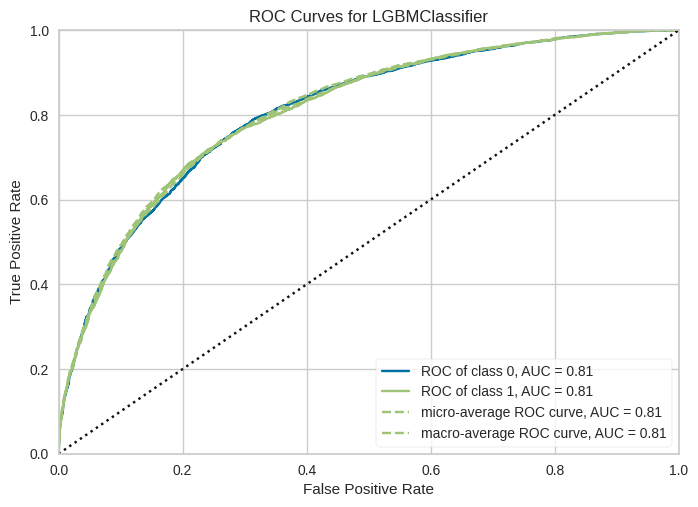

In [ ]:
plot_model(best, plot = 'auc')

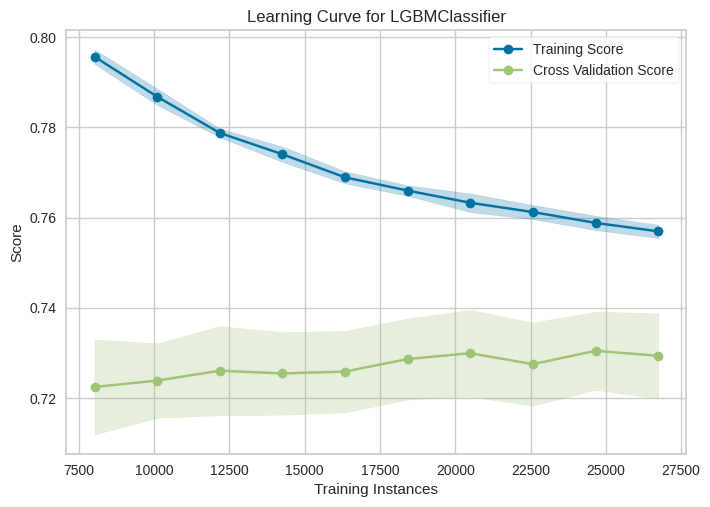

In [ ]:
plot_model(best, plot = 'learning')

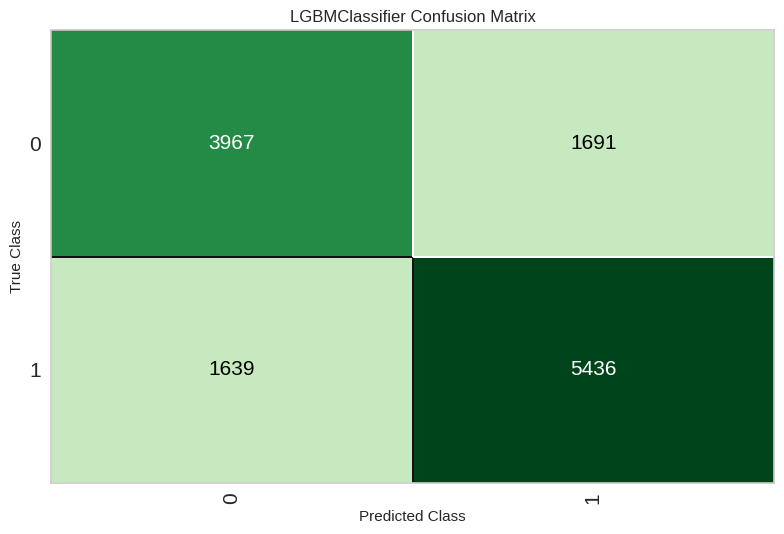

In [ ]:
plot_model(best, plot = 'confusion_matrix')

## prediction

In [ ]:

# functional API
predictions = predict_model(best, data=lda_test)
predictions.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,prediction_label,prediction_score
0,0.031166,0.038313,0.558473,0.371052,0.000997,Fake,0.5906
1,0.163554,0.000921,0.292882,0.541749,0.000893,Fake,0.5544
2,0.027974,0.031560,0.783913,0.156212,0.000342,Real,0.8157
3,0.002306,0.990787,0.002312,0.002320,0.002275,Real,0.8395
4,0.984914,0.000400,0.000404,0.013892,0.000390,Real,0.6484


In [ ]:
predictions['id'] = lda_test_id_temp
predictions

,topic_0,topic_1,topic_2,topic_3,topic_4,prediction_label,prediction_score,id
0,0.031166,0.038313,0.558473,0.371052,0.000997,Fake,0.5906,63e2vyej6oXukEfDdoGuA5
1,0.163554,0.000921,0.292882,0.541749,0.000893,Fake,0.5544,ZjYG72fdvd6JmazkS32ZFx
2,0.027974,0.031560,0.783913,0.156212,0.000342,Real,0.8157,ZYUhHXzaDxtncvd6nw8yiy
3,0.002306,0.990787,0.002312,0.002320,0.002275,Real,0.8395,HejAe5F5BGKD4HUYMT9DTg
4,0.984914,0.000400,0.000404,0.013892,0.000390,Real,0.6484,5ZjAEKgz9RCsBykjtYyp4S
...,...,...,...,...,...,...,...,...
20896,0.186470,0.000604,0.811755,0.000590,0.000580,Fake,0.7025,W425RhXCDso796s9LWrCye
20897,0.001662,0.001659,0.881804,0.113248,0.001627,Fake,0.6520,EWwMtde6s3skSDmLKXPojr
20898,0.065509,0.229445,0.052770,0.651891,0.000385,Real,0.7751,afMmnJ6K3LSpsHSPbaSr45
20899,0.002961,0.002918,0.631010,0.360235,0.002876,Fake,0.5050,MCakJo4x4pkoELSiPvtgkB


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Super AI SS3/Hackathon Online/Fake new Classification/data/sample_submission.csv')
submission

,id,label
0,63e2vyej6oXukEfDdoGuA5,Real
1,ZjYG72fdvd6JmazkS32ZFx,Fake
2,ZYUhHXzaDxtncvd6nw8yiy,Fake
3,HejAe5F5BGKD4HUYMT9DTg,NaN
4,5ZjAEKgz9RCsBykjtYyp4S,NaN
...,...,...
20904,W425RhXCDso796s9LWrCye,NaN
20905,EWwMtde6s3skSDmLKXPojr,NaN
20906,afMmnJ6K3LSpsHSPbaSr45,NaN
20907,MCakJo4x4pkoELSiPvtgkB,NaN


In [ ]:
submission = submission.merge(predictions, how='left', on='id')
submission

,id,label,topic_0,topic_1,topic_2,topic_3,topic_4,prediction_label,prediction_score
0,63e2vyej6oXukEfDdoGuA5,Real,0.031166,0.038313,0.558473,0.371052,0.000997,Fake,0.5906
1,ZjYG72fdvd6JmazkS32ZFx,Fake,0.163554,0.000921,0.292882,0.541749,0.000893,Fake,0.5544
2,ZYUhHXzaDxtncvd6nw8yiy,Fake,0.027974,0.031560,0.783913,0.156212,0.000342,Real,0.8157
3,HejAe5F5BGKD4HUYMT9DTg,NaN,0.002306,0.990787,0.002312,0.002320,0.002275,Real,0.8395
4,5ZjAEKgz9RCsBykjtYyp4S,NaN,0.984914,0.000400,0.000404,0.013892,0.000390,Real,0.6484
...,...,...,...,...,...,...,...,...,...
20904,W425RhXCDso796s9LWrCye,NaN,0.186470,0.000604,0.811755,0.000590,0.000580,Fake,0.7025
20905,EWwMtde6s3skSDmLKXPojr,NaN,0.001662,0.001659,0.881804,0.113248,0.001627,Fake,0.6520
20906,afMmnJ6K3LSpsHSPbaSr45,NaN,0.065509,0.229445,0.052770,0.651891,0.000385,Real,0.7751
20907,MCakJo4x4pkoELSiPvtgkB,NaN,0.002961,0.002918,0.631010,0.360235,0.002876,Fake,0.5050


In [ ]:
submission['label'] = submission['prediction_label']
submission = submission[['id','label']]
submission

,id,label
0,63e2vyej6oXukEfDdoGuA5,Fake
1,ZjYG72fdvd6JmazkS32ZFx,Fake
2,ZYUhHXzaDxtncvd6nw8yiy,Real
3,HejAe5F5BGKD4HUYMT9DTg,Real
4,5ZjAEKgz9RCsBykjtYyp4S,Real
...,...,...
20904,W425RhXCDso796s9LWrCye,Fake
20905,EWwMtde6s3skSDmLKXPojr,Fake
20906,afMmnJ6K3LSpsHSPbaSr45,Real
20907,MCakJo4x4pkoELSiPvtgkB,Fake


In [ ]:
submission.to_csv('submission.csv', index=False)